In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential

### Churn Model Predicton
- This is a project about how many coustomer bank will loss.
- Here we abserve some parameter(Gender, Tenure, Balance, NumofProducts, HasCECard, IsActiveMember, EstimatedSalary) and create model with the help of Tensorfow 

In [117]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [119]:
df.duplicated().sum()

0

In [120]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [121]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [122]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [123]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [124]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [125]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first= True)

In [126]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [127]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2 , random_state= 42)

In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [130]:
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim =11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [131]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics= ['accuracy'])

In [133]:
history = model.fit(X_train_scaled , y_train, epochs=100, validation_split= 0.2)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5752 - accuracy: 0.7314 - val_loss: 0.4847 - val_accuracy: 0.8000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.7989 - val_loss: 0.4473 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8044 - val_loss: 0.4324 - val_accuracy: 0.8100
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4374 - accuracy: 0.8091 - val_loss: 0.4219 - val_accuracy: 0.8169
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8202 - val_loss: 0.4125 - val_accuracy: 0.8256
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4128 - accuracy: 0.8261 - val_loss: 0.4030 - val_accuracy: 0.8344
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4009 - accuracy: 0.8322 - val_loss: 0.3931 - val_accuracy: 0.8350

In [140]:
import matplotlib.pyplot as plt 
history.history

{'loss': [0.575233519077301,
  0.4765506684780121,
  0.4512127935886383,
  0.43738582730293274,
  0.4250459372997284,
  0.41283825039863586,
  0.4008576273918152,
  0.3887009024620056,
  0.37752819061279297,
  0.3682681918144226,
  0.3608039915561676,
  0.35521185398101807,
  0.3505438566207886,
  0.3476833403110504,
  0.3456193506717682,
  0.3432239294052124,
  0.3424147665500641,
  0.3408326208591461,
  0.3397129476070404,
  0.3394540548324585,
  0.3384820222854614,
  0.3368876278400421,
  0.3363787531852722,
  0.3356929421424866,
  0.33528006076812744,
  0.33530566096305847,
  0.33447498083114624,
  0.3335341513156891,
  0.33302444219589233,
  0.3331905007362366,
  0.33217597007751465,
  0.3318365216255188,
  0.3307363986968994,
  0.32971519231796265,
  0.33058544993400574,
  0.3306514024734497,
  0.3300391733646393,
  0.3295516073703766,
  0.3290761113166809,
  0.3291339576244354,
  0.32871487736701965,
  0.3285093605518341,
  0.32850486040115356,
  0.3275890350341797,
  0.32810252

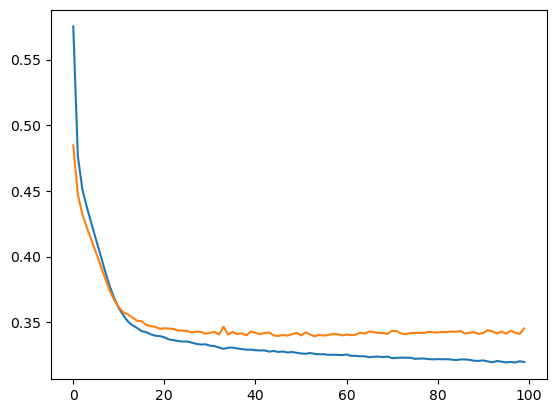

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

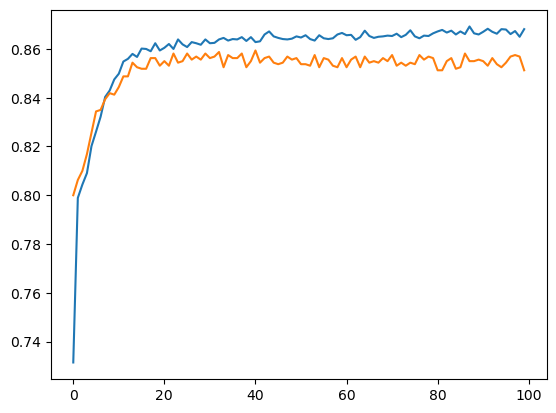

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [134]:
model.layers[0].get_weights()

[array([[-0.00193153, -0.21484995,  0.24604677, -0.23638996, -0.20374623,
          0.16095215, -0.05312813, -0.17996657,  0.39001173, -0.26085895,
         -0.02160776],
        [-0.98624945,  0.36515668,  0.5409562 ,  1.4261549 ,  0.50962645,
          0.21167687, -0.07193993, -0.32135814, -0.3771987 , -0.08719947,
         -0.0260949 ],
        [-0.06019722,  0.07237463,  0.18077406, -0.18898587, -0.12919322,
          0.02250841, -0.00441597, -0.11404592,  0.31250405, -0.18005475,
         -0.06117935],
        [-0.1067699 , -0.40318382, -0.58077323, -0.3061022 , -0.11202393,
          0.21711941, -0.10000653, -0.2132739 , -0.49654338,  0.23787148,
         -0.5855672 ],
        [ 0.04954068, -0.49356875, -0.27878192,  0.05494903,  0.17779778,
          0.83110005, -1.1249601 , -0.09277876,  0.25523916,  0.9963184 ,
         -0.891461  ],
        [-0.10917455, -0.30131942, -0.15264556,  0.27709225,  0.6172149 ,
         -0.35337493,  0.07841703,  0.6895398 , -0.02252975,  0.1880192

In [135]:
model.layers[0].get_weights()

[array([[-0.00193153, -0.21484995,  0.24604677, -0.23638996, -0.20374623,
          0.16095215, -0.05312813, -0.17996657,  0.39001173, -0.26085895,
         -0.02160776],
        [-0.98624945,  0.36515668,  0.5409562 ,  1.4261549 ,  0.50962645,
          0.21167687, -0.07193993, -0.32135814, -0.3771987 , -0.08719947,
         -0.0260949 ],
        [-0.06019722,  0.07237463,  0.18077406, -0.18898587, -0.12919322,
          0.02250841, -0.00441597, -0.11404592,  0.31250405, -0.18005475,
         -0.06117935],
        [-0.1067699 , -0.40318382, -0.58077323, -0.3061022 , -0.11202393,
          0.21711941, -0.10000653, -0.2132739 , -0.49654338,  0.23787148,
         -0.5855672 ],
        [ 0.04954068, -0.49356875, -0.27878192,  0.05494903,  0.17779778,
          0.83110005, -1.1249601 , -0.09277876,  0.25523916,  0.9963184 ,
         -0.891461  ],
        [-0.10917455, -0.30131942, -0.15264556,  0.27709225,  0.6172149 ,
         -0.35337493,  0.07841703,  0.6895398 , -0.02252975,  0.1880192

In [136]:
model.layers[1].get_weights()

[array([[ 0.55079955,  0.30987114, -0.64457154,  0.75123894, -0.04710899,
         -0.47016534, -0.5904163 ,  0.45560473, -0.15540512, -0.79980177,
         -0.00965198],
        [ 0.32816896, -0.12967245, -0.02172558,  0.38735512, -0.16162947,
         -0.3797922 ,  0.16393192, -0.83531344,  0.09461188,  0.41362   ,
          0.19844474],
        [ 0.52688473,  0.18844087, -0.49904624,  0.44772443,  0.27827817,
          0.7105796 ,  0.01753826, -0.29638493,  0.10595512, -0.00711889,
          0.588902  ],
        [-0.0507777 ,  0.58827525,  0.50877905,  0.45088923, -0.35809866,
         -0.13126306, -0.07192707,  0.6439554 , -1.0827999 ,  0.18259402,
         -0.54116344],
        [ 0.14582156, -0.34853706, -0.59029216,  0.11827726,  0.06260008,
         -0.18188564, -0.71829164, -0.26172486,  0.35581344,  0.02513089,
          0.54156977],
        [-0.22224487,  0.6876347 ,  0.8664265 ,  0.05453965,  0.43203726,
          0.28152764,  0.6162005 ,  0.41447106, -0.09087886,  0.57441  

In [137]:
y_log =model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [138]:
y_pred = np.where (y_log > 0.5, 1,0)

In [139]:
accuracy_score(y_test, y_pred)

0.864